In [29]:
# import function from distance notebook
from ipynb.fs.defs.distance import away_or_home
from matplotlib.animation import FuncAnimation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib widget


In [85]:
# I lowkey don't really know how matplotlib works so I just layered three scatterplots and it somehow worked ??
#  e_t = events and tracking
def create_gif(row, frame_cnt, game_id, e_t_df):
    hull_dif = round(row["hull_diff"],2)
    start_frame = row["EVENTNUM"]
    start_row_index = e_t_df.loc[e_t_df['EVENTNUM'] == start_frame].index[0]
    print(start_row_index)
    gif_name = f"./gifs/{game_id}/SHOT_{start_row_index}"
    fig = plt.figure()
    # 2nd spectrum coord system has these limits, source: WISD instructions
    ax = plt.axes(xlim=(-47, 47), ylim=(-25, 25))

    home_scat = ax.scatter([], [])
    away_scat = ax.scatter([], [])
    ball_scat = ax.scatter([], [])
    home_scat.set_color('red')
    away_scat.set_color('blue')
    ball_scat.set_color('orange')

    def plot_players(i):
        i += start_row_index -10
        plot_row = e_t_df.iloc[i]
        home_coords = [x['xyz']
                       for x in eval(plot_row['homePlayers_tracking'])]
        home_coords = np.array(home_coords)
        home_scat.set_offsets(home_coords)
        away_coords = np.array([x['xyz']
                               for x in eval(plot_row['awayPlayers_tracking'])])
        away_scat.set_offsets(away_coords)
        ball_coords = eval(plot_row['ball'])
        ball_scat.set_offsets([ball_coords])

        ax.set_xlabel(
            f'frame {plot_row.name}, {plot_row["eventType"]}, hull diff: {hull_dif}', fontsize=12)
        return home_scat, away_scat, ball_scat

    ani = FuncAnimation(fig, plot_players, frames=frame_cnt, repeat=False)
    ani.save(f'{gif_name}.gif')


MovieWriter ffmpeg unavailable; using Pillow instead.


3196


MovieWriter ffmpeg unavailable; using Pillow instead.


2796


MovieWriter ffmpeg unavailable; using Pillow instead.


632


MovieWriter ffmpeg unavailable; using Pillow instead.


1535


MovieWriter ffmpeg unavailable; using Pillow instead.


2690


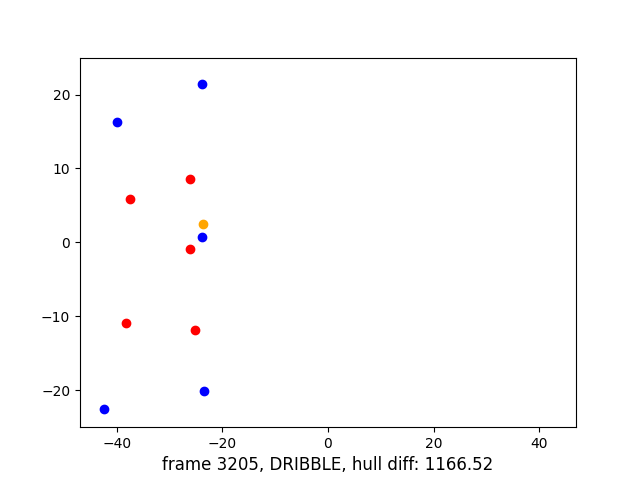

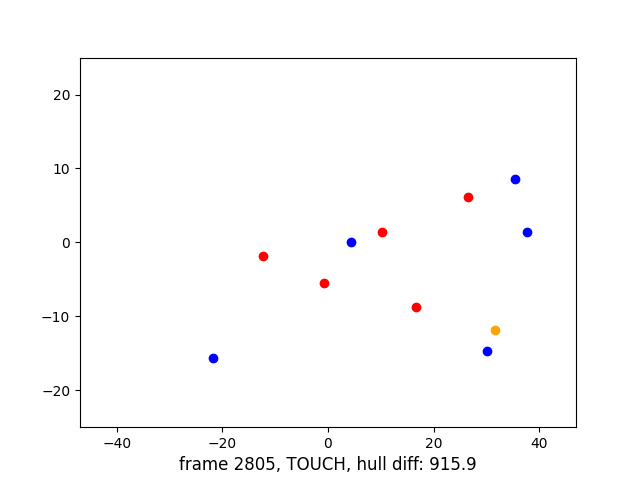

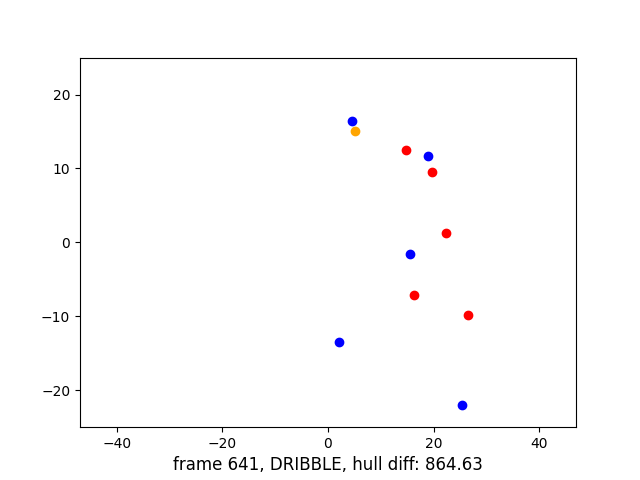

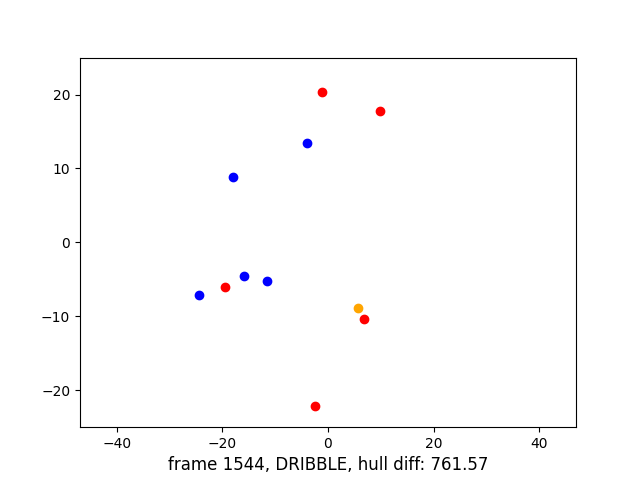

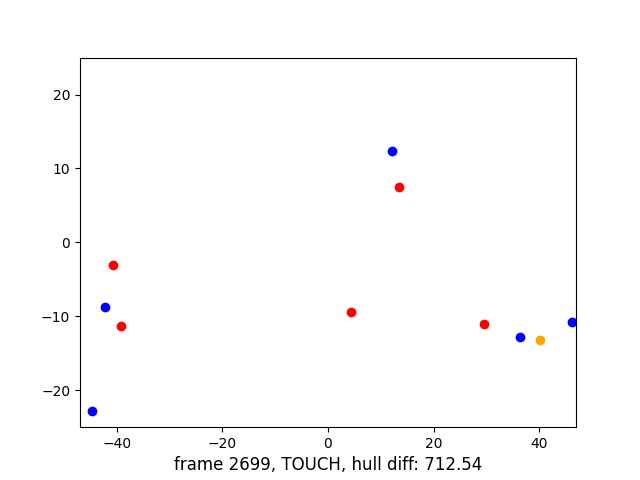

In [86]:
game_ids = ['0042100301', '0042100304', '0042100307', '0042100313', '0042100401', '0042100404', '0042100302', '0042100305', '0042100311',
            '0042100314', '0042100402', '0042100405', '0042100303', '0042100306', '0042100312', '0042100315', '0042100403', '0042100406']
# I generated this file in distance.ipynb
# events and tracking csv
for game_id in game_ids:
    e_t_df = pd.read_csv(f"./games/{game_id}/{game_id}_e_t.csv", index_col=0)
    top_df = pd.read_csv(f"./games/{game_id}/{game_id}_top.csv")
    top_df = top_df.head(5)

    gif_folder = fr'/Users/mwin/Desktop/Code/wisd hackathon 2023/gifs/{game_id}'
    if not os.path.exists(gif_folder):
        os.makedirs(gif_folder)
    top_df.apply(create_gif, axis=1, args=(20, game_id, e_t_df))
    break
